In [ ]:
## Q1

All Eigenvalues:
[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
Number of Eigenvalues above 1: 3


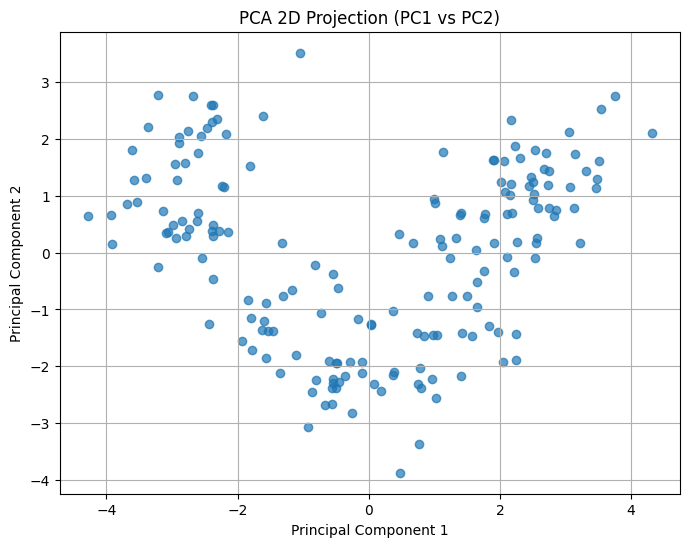

Variance explained by the first 2 components: 0.5541


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("wines.csv")
X = data.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

eigenvalues = pca.explained_variance_
print("All Eigenvalues:")
print(eigenvalues)

num_eigen_above_one = np.sum(eigenvalues > 1)
print(f"Number of Eigenvalues above 1: {num_eigen_above_one}")

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.title("PCA 2D Projection (PC1 vs PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

explained_variance_2d = np.sum(pca.explained_variance_ratio_[:2])
print(f"Variance explained by the first 2 components: {explained_variance_2d:.4f}")

In [ ]:
## Q2

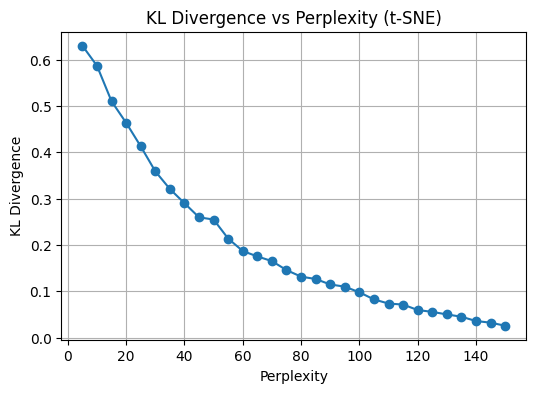

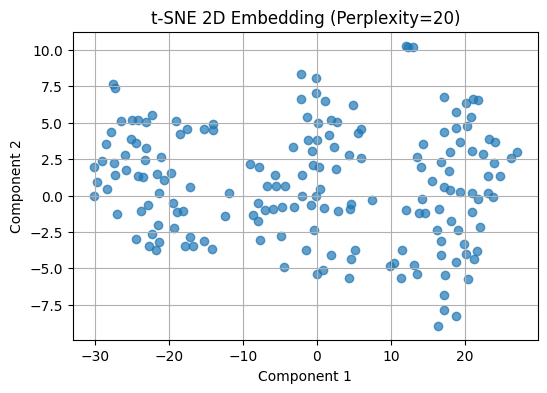

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("wines.csv")
X = data.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

perplexities = np.arange(5, 155, 5)
kl_divergences = []

for perp in perplexities:
    tsne = TSNE(n_components=2, perplexity=perp, random_state=0)
    tsne.fit_transform(X_scaled)
    kl_divergences.append(tsne.kl_divergence_)

plt.figure(figsize=(6, 4))
plt.plot(perplexities, kl_divergences, marker='o')
plt.title('KL Divergence vs Perplexity (t-SNE)')
plt.xlabel('Perplexity')
plt.ylabel('KL Divergence')
plt.grid(True)
plt.show()

tsne_20 = TSNE(n_components=2, perplexity=20, random_state=0)
X_embedded = tsne_20.fit_transform(X_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha=0.7)
plt.title('t-SNE 2D Embedding (Perplexity=20)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

In [ ]:
## Q3

Resulting Stress from MDS embedding: 21818.8940


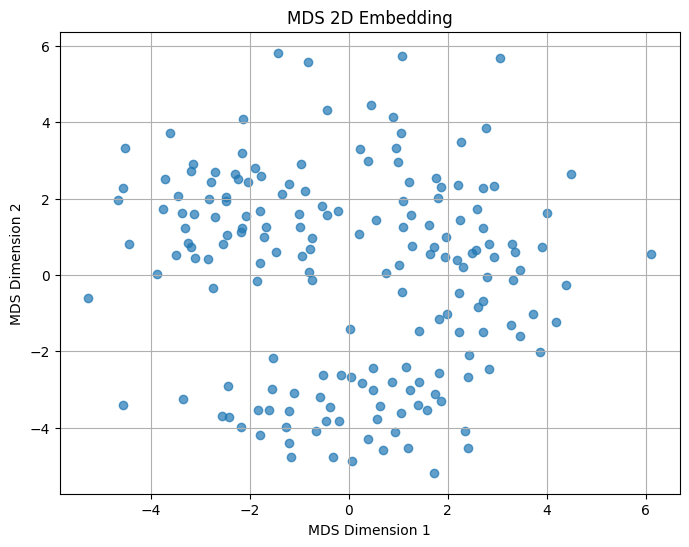

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("wines.csv")
X = data.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mds = MDS(n_components=2, dissimilarity='euclidean', random_state=0, normalized_stress='auto')
X_mds = mds.fit_transform(X_scaled)

stress = mds.stress_
print(f"Resulting Stress from MDS embedding: {stress:.4f}")

plt.figure(figsize=(8,6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], alpha=0.7)
plt.title("MDS 2D Embedding")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.grid(True)
plt.show()


In [4]:
## Q4 Choosing PCA

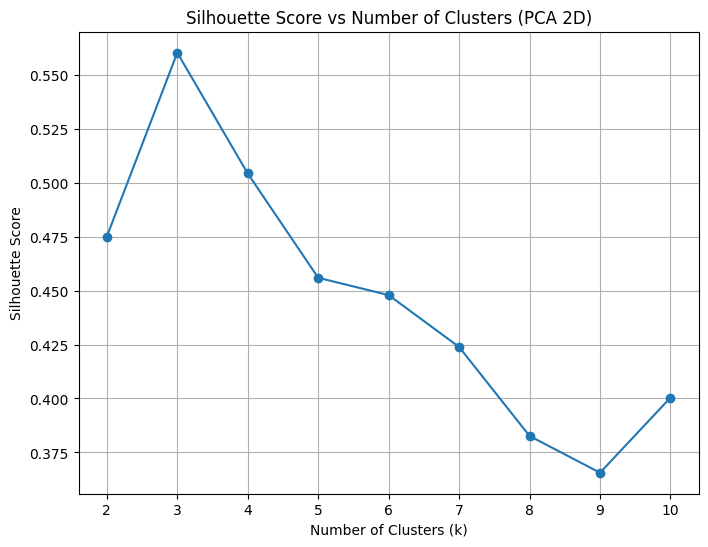

Optimal number of clusters (k): 3


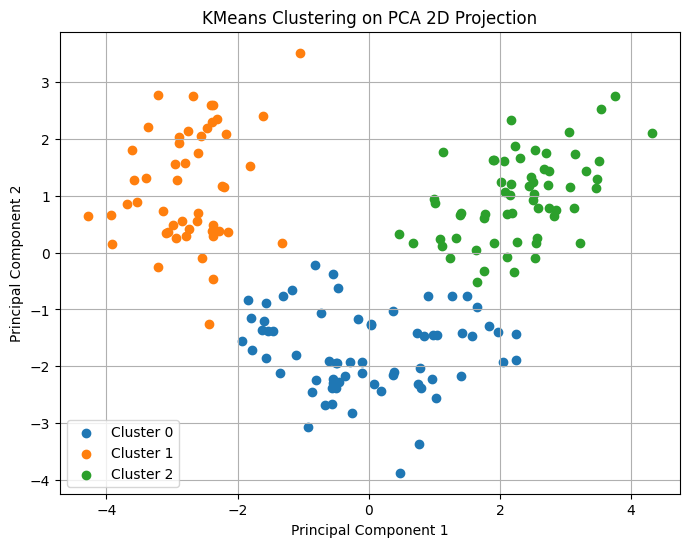

Total sum of distances to cluster centers (Inertia): 260.0167


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = pd.read_csv("wines.csv")
X = data.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters (PCA 2D)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (k): {best_k}")

kmeans_final = KMeans(n_clusters=best_k, random_state=0)
final_labels = kmeans_final.fit_predict(X_pca)
kmeans_final_labels = final_labels

plt.figure(figsize=(8,6))
for cluster in np.unique(final_labels):
    plt.scatter(X_pca[final_labels == cluster, 0], X_pca[final_labels == cluster, 1], label=f'Cluster {cluster}')
plt.title('KMeans Clustering on PCA 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

total_inertia = kmeans_final.inertia_
print(f"Total sum of distances to cluster centers (Inertia): {total_inertia:.4f}")


In [6]:
## Q5 Choosing PCA

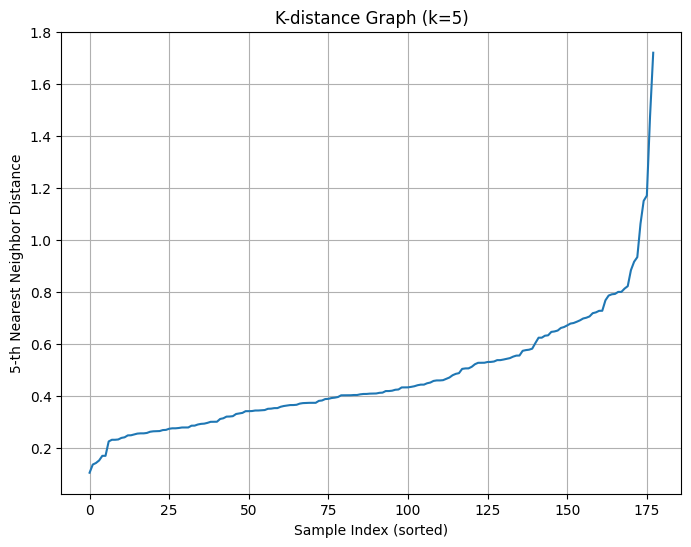

Selected epsilon (approx from K-distance graph): 0.7271
Best min_samples: 10, Best Silhouette Score: 0.4700


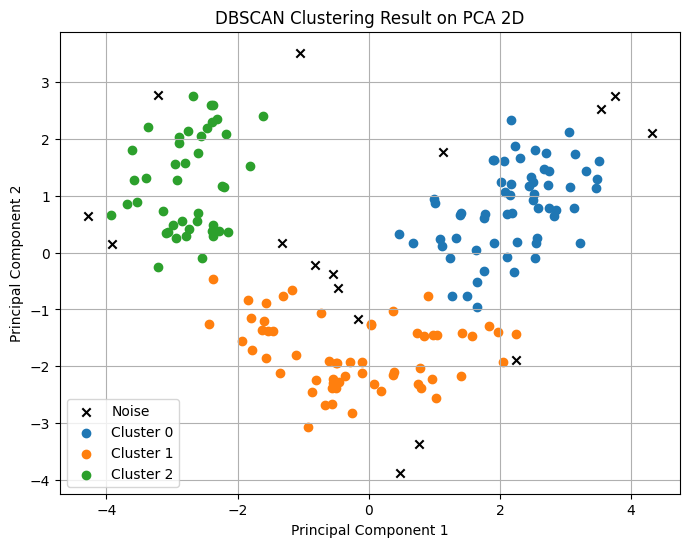

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

data = pd.read_csv("wines.csv")
X = data.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

min_samples_default = 5
neighbors = NearestNeighbors(n_neighbors=min_samples_default)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)

distances = np.sort(distances[:, min_samples_default-1])
plt.figure(figsize=(8,6))
plt.plot(distances)
plt.title('K-distance Graph (k=5)')
plt.xlabel('Sample Index (sorted)')
plt.ylabel(f'{min_samples_default}-th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

epsilon = distances[int(0.9 * len(distances))]
print(f"Selected epsilon (approx from K-distance graph): {epsilon:.4f}")

best_score = -1
best_min_samples = None
best_labels = None

for min_samples in range(4, 11):
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    labels = dbscan.fit_predict(X_pca)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        score = silhouette_score(X_pca, labels)
        if score > best_score:
            best_score = score
            best_min_samples = min_samples
            best_labels = labels


print(f"Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score:.4f}")

final_dbscan = DBSCAN(eps=epsilon, min_samples=best_min_samples)
final_labels = final_dbscan.fit_predict(X_pca)
dbscan_final_labels = final_labels

plt.figure(figsize=(8,6))
unique_labels = np.unique(final_labels)
for label in unique_labels:
    if label == -1:
        # Noise points
        plt.scatter(X_pca[final_labels == label, 0], X_pca[final_labels == label, 1], 
                    c='k', marker='x', label='Noise')
    else:
        plt.scatter(X_pca[final_labels == label, 0], X_pca[final_labels == label, 1], 
                    label=f'Cluster {label}')
plt.title('DBSCAN Clustering Result on PCA 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
## extra credit1

Silhouette Score (kMeans): 0.5602
Silhouette Score (DBSCAN): 0.5787
Number of Noise Points detected by DBSCAN: 16
Cluster Sizes (including noise):
Cluster 0: 60 samples
Cluster -1: 16 samples
Cluster 1: 59 samples
Cluster 2: 43 samples


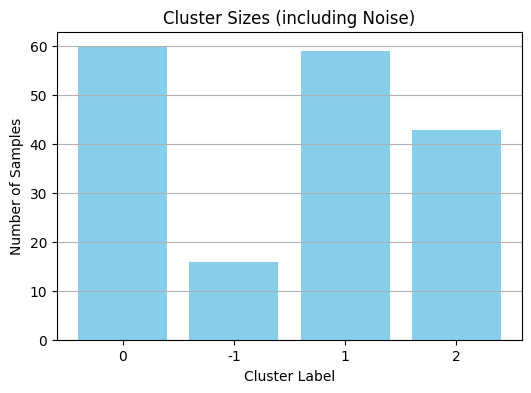

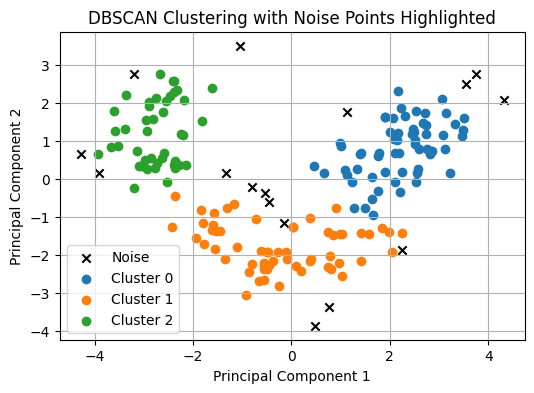

In [23]:
from sklearn.metrics import silhouette_score
import collections
import matplotlib.pyplot as plt
import numpy as np

mask = dbscan_final_labels != -1
silhouette_kmeans = silhouette_score(X_pca, kmeans_final_labels)
silhouette_dbscan = silhouette_score(X_pca[mask], dbscan_final_labels[mask])
print(f"Silhouette Score (kMeans): {silhouette_kmeans:.4f}")
print(f"Silhouette Score (DBSCAN): {silhouette_dbscan:.4f}")

n_noise_points = np.sum(dbscan_final_labels == -1)
print(f"Number of Noise Points detected by DBSCAN: {n_noise_points}")

cluster_sizes = collections.Counter(dbscan_final_labels)
print("Cluster Sizes (including noise):")
for label, size in cluster_sizes.items():
    print(f"Cluster {label}: {size} samples")

plt.figure(figsize=(6,4))
labels = list(cluster_sizes.keys())
sizes = list(cluster_sizes.values())
plt.bar([str(l) for l in labels], sizes, color='skyblue')
plt.title('Cluster Sizes (including Noise)')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(6,4))
unique_labels = np.unique(dbscan_final_labels)

for label in unique_labels:
    if label == -1:
        plt.scatter(X_pca[dbscan_final_labels == label, 0], X_pca[dbscan_final_labels == label, 1],
                    c='k', marker='x', label='Noise')
    else:
        plt.scatter(X_pca[dbscan_final_labels == label, 0], X_pca[dbscan_final_labels == label, 1],
                    label=f'Cluster {label}')

plt.title('DBSCAN Clustering with Noise Points Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
